<style>
    .professional-bg {
        background-color: #f0f0f0;
        padding: 20px;
    }
</style>

<div class="professional-bg">

# Sentiment Analysis using BERT

## Why BERT?

### (Bidirectional Encoder Representations from Transformers) offers several advantages for sentiment analysis compared to traditional sentiment analysis tools like VADER. Here's why BERT is considered superior in many cases:

1. **Contextual Understanding:**

    BERT has a deep understanding of the context in which words appear. It takes into account the entire sentence or document, capturing the relationships between words and their impact on sentiment.

2. **Pre-trained on Large Corpora:**

    BERT is pre-trained on massive amounts of text data, learning from a wide range of contexts and domains. This pre-training allows BERT to handle sentiment analysis across various topics and writing styles.

3. **Handling Negation and Sarcasm:**

    BERT can better handle negations and sarcasm, which are common challenges in sentiment analysis. It understands that negation words (e.g., "not") can completely reverse the sentiment of a sentence.

4. **Customization:**

    BERT's architecture allows for customization and fine-tuning to meet specific business or domain requirements. You can adapt BERT to perform sentiment analysis tailored to your needs.

5. **State-of-the-Art Performance:**

    BERT consistently achieves state-of-the-art performance on a wide range of natural language processing tasks, including sentiment analysis.

</div>


In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amazon-cell-phones-reviews/20191226-items.csv
/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv
/kaggle/input/google-play-store-reviews/reviews.csv


<style>
    .navy-bg {
        background-color: navy blue;
        color: white;
        padding: 10px;
    }
</style>

<div class="navy-bg">

## Loading the Datasets

Datasets have amazon cell phone reviews for apple & other brands with ratings given by users

</div>


In [56]:
#Loading the datasets
import pandas as pd
items = pd.read_csv("/kaggle/input/amazon-cell-phones-reviews/20191226-items.csv")
reviews = pd.read_csv("/kaggle/input/amazon-cell-phones-reviews/20191226-reviews.csv")

In [57]:
#Shape of the dataset
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(items.shape))
items.head()

The dataset contains  720 rows and  10 variables.


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [58]:
items.describe(include="all")

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720,720,720.000000,720,720.000000,720.000000,720.000000
unique,720,10,718,720,679,NaN,720,NaN,NaN,NaN
top,B01N9TM7KG,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,https://www.amazon.com/Google-GA00139-US-Veriz...,https://m.media-amazon.com/images/I/817r8IrEN5...,NaN,https://www.amazon.com/product-reviews/B07ZQSGP53,NaN,NaN,NaN
freq,1,346,2,1,3,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.713750,NaN,105.679167,234.948931,63.690778
std,NaN,NaN,NaN,NaN,NaN,0.716014,NaN,167.601101,200.008441,172.405370
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,7.000000,97.512500,0.000000
50%,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,32.000000,188.975000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,122.250000,336.725000,0.000000


In [59]:
#Reviews dataset shape & details
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(reviews.shape))
reviews.head()

The dataset contains  67,986 rows and  8 variables.


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [60]:
#Merging the two datasets into one dataframe using "asin" as the primary key to join
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [61]:
#Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [62]:
#Convert string into datetime
from datetime import datetime
reviews["date"] = reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [63]:
#This line of code will create a "month" column, representing the year and month as a period.
reviews["month"] = reviews["date"].dt.to_period('M')
reviews["month"].head()

0    2005-10
1    2004-01
2    2003-12
3    2004-03
4    2005-08
Name: month, dtype: period[M]

In [64]:
# 0.9 Add posivity label
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

# Text Cleaning & Preparation for Sentiment Analysis

This part of the code is related to text preprocessing for sentiment analysis. It involves several steps to prepare the text data for analysis:
* Converting to Lowercase: 
    The code snippet text = text.lower() converts the text to lowercase. This is done to ensure that the text is treated consistently and that the model doesn't consider the same word in uppercase and lowercase as different words. For example, "Good" and "good" should be treated the same when determining sentiment.
* Removing Punctuation: 
    The next step is to remove punctuation from the text. Punctuation marks like commas, periods, and exclamation points don't usually carry sentiment information by themselves. Removing them simplifies the text and reduces the dimensionality of the data. For example, "I love it!" and "I love it" should be treated the same in sentiment analysis.
* WordNetLemmatizer: 
    WordNetLemmatizer is a part of NLTK that performs lemmatization. Lemmatization is the process of reducing words to their base or dictionary form. For example, it converts "running" to "run," "better" to "good," etc. Lemmatization aims to remove inflections and variations to identify the base meaning or dictionary form of a word.
* Removing Stopwords: 
    Stopwords are common words like "a," "an," "the," "in," "on," etc., that occur frequently in a language. They are often removed from text because they don't typically contribute much to the sentiment or meaning of the text. Removing stopwords can reduce noise in the data and help focus on more meaningful words. 'stopwords.words('english'):'' In this part, stopwords.words('english') is a function call provided by the Natural Language Toolkit (NLTK) library. 
* Removing Keywords: 
    The code also removes specific keywords that are defined in the variable "keywords." These keywords are typically related to the context of the analysis. In this case, "brand" names and the word "phone" are removed. This step may be important if you want to focus on the general sentiment of the text and not let specific keywords dominate the analysis.
    
    
    Overall, these preprocessing steps are essential for improving the quality and performance of sentiment analysis models, as they help the model focus on the relevant content and ensure consistency in the text data.

In [65]:
# Import necessary libraries
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

your_dataframe = pd.DataFrame({'brand': ['Apple', 'Samsung', 123, 'Nokia', 'Motorola']})

# Convert any non-string values in the 'brand' column to strings
your_dataframe['brand'] = your_dataframe['brand'].astype(str)

# Define stopwords, punctuation, and keywords
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = your_dataframe["brand"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")

# Create a WordNet Lemmatizer
lemma = WordNetLemmatizer()

# Define your clean_text function
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into a list of words
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatization
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

# Test your clean_text function
cleaned_text = clean_text("The best part about iphone is its security. The security feature should not be underestimated when purchasing a phone.")
print(cleaned_text)


best part iphone security security feature underestimated purchasing


In [66]:
# 1.2 Apply preprocess function to the dataframe
reviews["body"] = reviews["body"].astype("str")
reviews["clean_text"] = reviews["body"].apply(clean_text)

In [67]:
reviews["clean_text"].head().values

array(["a600 awhile absolute doo doo read review detect rage stupid thing finally died used bought garage sale 1 wonder sold cheap bad  hate menu take forever get want scroll endlessly usually phone numbered category u simply press  get want go  pain put silent vibrate class ring turn immediately there's fast way silence damn thing always remember put silent learned hard way  true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening  button could bit bigger vibration could stronger good  reception shabby using elevator remarkable feat considering old would lose service simply putting pocket  compared old work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos  nice bright large screen  cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get great",
       "due softwa

# Any further analysis is done on Apple reviews.

In [68]:
reviews = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)

### Import Libraries and Set the intial variables

In [69]:
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

### In the context of transformers and natural language processing (NLP), the below libraries perform the following tasks:

* Transformers: 
    This is the main Python library for working with transformer-based models in NLP developed by Hugging Face that provides pre-trained transformer models, as well as tools for fine-tuning, training, and using these models for various NLP tasks. It includes a wide range of transformer architectures, such as BERT, GPT, RoBERTa, and more. For my analysis i have used BERT.

* BertModel: 
    I have used this class to load a pre-trained BERT model and use it for NLP tasks such as sentiment analysis.

* BertTokenizer: 
    Tokenization is the process of breaking text into individual words or subword tokens. The BertTokenizer is specifically designed for BERT models and ensures that the text is tokenized in a way that is compatible with BERT's pre-trained vocabulary.

* AdamW: 
    I have used the AdamW optimizer from the PyTorch library for updating the model's weights during training. It's a variant of the Adam optimizer with weight decay, which helps prevent overfitting during training.

* get_linear_schedule_with_warmup: 
    This function is used to create a schedule for learning rate warm-up and decay during training. Learning rate schedules are crucial for training deep learning models effectively. This function is often used in conjunction with the AdamW optimizer to set up a learning rate schedule that starts with a warm-up phase, where the learning rate gradually increases, and then a decay phase, where it gradually decreases.

* torch: 
    This is the main PyTorch library deep learning framework. PyTorch provides a wide range of tools and functions for building and training neural networks, including support for automatic differentiation and GPU acceleration.

* nn (torch.nn): 
    The nn module in PyTorch provides classes and functions for building neural network architectures. It includes various layers, activation functions, loss functions, and modules for creating custom neural network architectures.

* optim (torch.optim): 
    The optim module in PyTorch provides various optimization algorithms for training neural networks. It includes popular optimizers like Adam, SGD, and more.

* DataLoader: 
    DataLoader is a PyTorch utility that is used to load data in mini-batches for training deep learning models. It's particularly useful when working with large datasets, and it handles tasks like shuffling data, batching, and parallel data loading efficiently.

In [71]:
# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [73]:
!nvidia-smi

Mon Oct 30 18:54:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    34W / 250W |   5219MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Load the data

We need only two columns viz... Body (which has the review/content) as well as the rating given by the users.

In [74]:
df = reviews
df.shape

(5145, 20)

In the below code i am adding two rows to the 'reviews' dataset to augment the training dataset.

In [75]:
df = df[["rating", "body"]]

# Create a dictionary with the new row data
new_row = {"rating": 1, "body": "pathetic phone"}
new_row = {"rating": 1, "body": "Significant deterioration or dip in performance"}

# Append the new row to the DataFrame
df = df.append(new_row, ignore_index=True)

In [76]:
# Let's have a look at the data 
df.tail()

,rating,body
5141,5,Works like a champ
5142,4,Pretty satisfied. One question. Having trouble...
5143,2,the product and the reviews seem to be VERY mi...
5144,5,Extremely happy sometimes have to remind mysel...
5145,1,Significant deterioration or dip in performance


In [77]:
# Checking for missing values 
df.isnull().sum()

rating    0
body      0
dtype: int64

## Data Overview and Class Allotment

In our dataset, we have observed the presence of missing values in some of the rating entries. However, the "content" and "body" fields are complete with no missing values. To gain a better understanding of the data and prepare it for sentiment analysis, we will also take a closer look at the class balance.

**Class Allotment:**

To facilitate sentiment analysis, we will categorize the reviews into three distinct classes based on the score:

1. **Positive** (Score: 4-5): Reviews with highly positive sentiments.
2. **Neutral** (Score: 3): Reviews with neutral sentiments.
3. **Negative** (Score: 1-2): Reviews with negative sentiments.

This categorization will allow us to perform sentiment analysis effectively and gain insights into the sentiment distribution within the dataset.

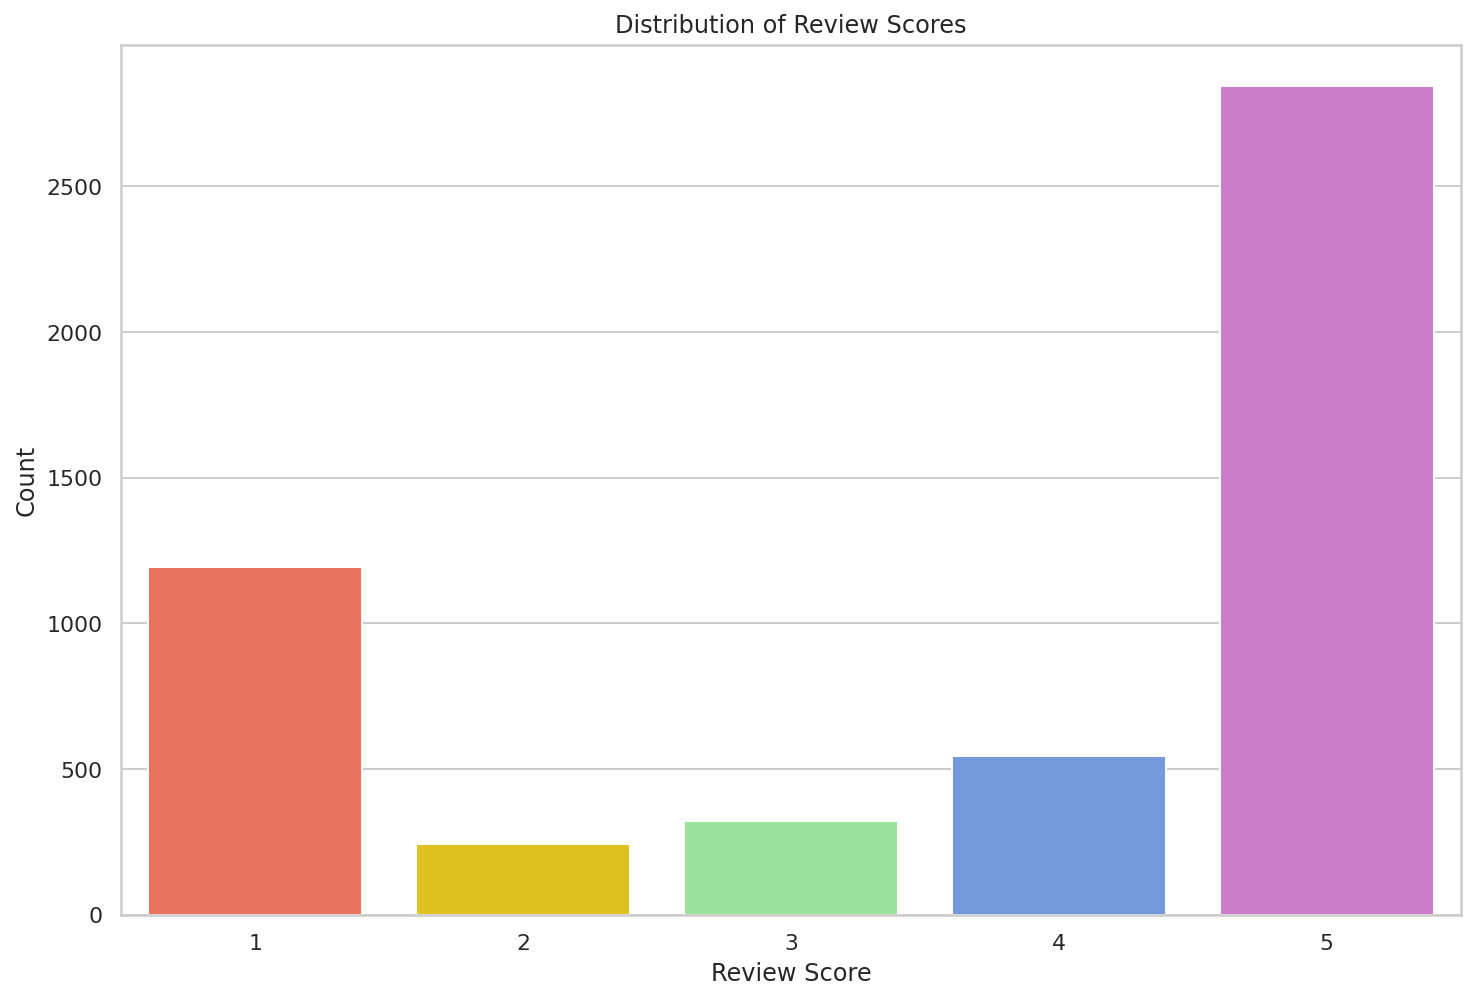

In [78]:
# Class Balance
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and labels
colors = ["#FF6347", "#FFD700", "#90EE90", "#6495ED", "#DA70D6"]  # Specify your desired colors
labels = ['1', '2', '3', '4', '5']

# Create the countplot
sns.set(style="whitegrid")
sns.countplot(data=df, x='rating', palette=colors)

# Set labels and title
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')

# Set custom x-axis labels
ax = plt.gca()
ax.set_xticklabels(labels)

# Show the plot
plt.show()


**Class Labeling Based on Review Scores**

To better understand and analyze the sentiment of the reviews, we have categorized them into three distinct classes:

- Class 0: **Negative**: Reviews with low scores, indicating negative sentiment.
- Class 1: **Neutral**: Reviews with moderate scores, representing a neutral sentiment.
- Class 2: **Positive**: Reviews with high scores, signifying positive sentiment.

This classification allows us to gain insights into the sentiment distribution among the reviews and paves the way for further sentiment analysis.

In [79]:
# Define the mapping from ratings to sentiment
rating_to_sentiment = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}

# Apply the mapping to the dataset
df['sentiment'] = df['rating'].map(rating_to_sentiment)


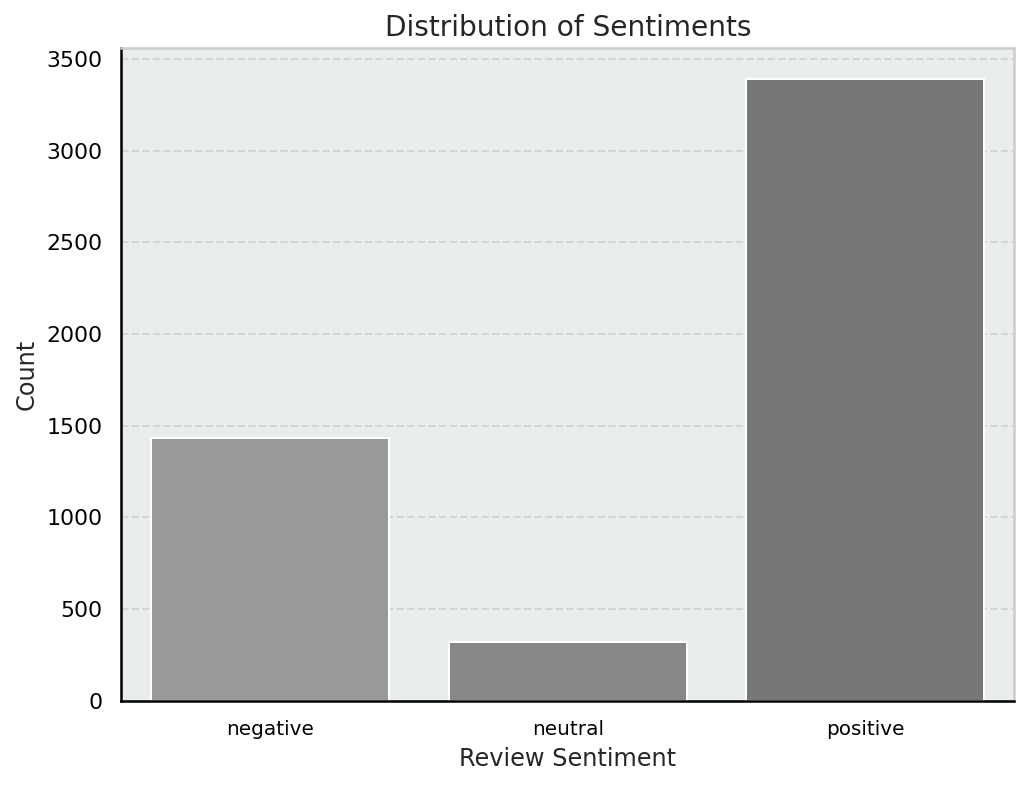

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with shades of grey
custom_palette = ['#999999', '#888888', '#777777']

# Plot the distribution
class_names = ['negative', 'neutral', 'positive']
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=df, x='sentiment', palette=custom_palette)
plt.xlabel('Review Sentiment', fontsize=12)
ax.set_xticklabels(class_names, fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Sentiments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the background
ax.set_facecolor('#EAEDED')  # Light grey background
ax.spines['bottom'].set_color('black')  # Black x-axis
ax.spines['left'].set_color('black')    # Black y-axis
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()


## Data Preprocessing

Machine Learning models don’t work with raw text. You need to convert text to numerical representation. BERT requires even more attention when it comes to this representation. 

Here are the requirements:

* Add special tokens to separate sentences and do classification
* Pass sequences of constant length (introduce padding)
* Create array of 0s (pad token) and 1s (real token) called attention mask

BERT offers a few model architectures and I will be using one of them combined with manual preprocessing. I am using the cased version which considers GREAT and great to be to different entities and BAD might be given more focus than bad.  

The tokenizer will break the sentence into words and give numerical values to each word. 

# Choosing the Right BERT Model for Sentiment Analysis

BERT (Bidirectional Encoder Representations from Transformers) offers a variety of pre-trained models, each with its own characteristics and use cases. When selecting a BERT model for sentiment analysis, it's important to consider several factors. Here are some commonly used BERT models and their considerations:

1. **bert-base-uncased**: This is a base model with a smaller number of parameters. It's fast and less resource-intensive, making it suitable for a wide range of NLP tasks.

2. **bert-large-uncased**: If you need more capacity and are willing to invest in additional computational resources, the larger uncased model offers improved performance.

3. **bert-base-cased**: Similar to `bert-base-uncased`, but it retains the case information. This can be useful if your analysis depends on word case (e.g., "GREAT" vs. "great").

4. **bert-large-cased**: The cased version of the large model, providing more capacity for complex tasks.

5. **bert-base-multilingual**: This model is trained on text from multiple languages, making it suitable for multilingual sentiment analysis.

Considerations for Choosing a Model:
- **Task Requirements**: The choice should align with the specific requirements of your sentiment analysis task.

- **Computational Resources**: Larger models require more computational power and memory. Infrastructure should support the chosen model.

- **Language Specifics**: The decision to use cased or uncased models depends on whether word case is relevant in the analysis.

- **Multilingual Support**: If you need to analyze sentiment in multiple languages, the multilingual model is a suitable choice.

- **Fine-Tuning**: Fine-tuning a pre-trained model on your sentiment dataset can lead to optimal performance.

Ultimately, the choice of the best BERT model depends on the dataset, project scale, and available resources. It's advisable to experiment with different models to find the one that performs best for the specific sentiment analysis task.

In [81]:
# Set the model name
MODEL_NAME = 'bert-base-uncased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [82]:
# Some of the common BERT tokens
# BERT special tokens and their IDs
special_tokens = {
    "SEP Token": (tokenizer.sep_token, tokenizer.sep_token_id),  # Marker for ending a sentence.     "CLS Token": (tokenizer.cls_token, tokenizer.cls_token_id),  # Start of each sentence, used for classification. It is used for classification tasks and helps the model understand that the input text needs classification.
    "CLS Token": (tokenizer.cls_token, tokenizer.cls_token_id),  # Start of each sentence, used for classification. It is used for classification tasks and helps the model understand that the input text needs classification.
    "PAD Token": (tokenizer.pad_token, tokenizer.pad_token_id),  # Special token for padding
    "UNK Token": (tokenizer.unk_token, tokenizer.unk_token_id),  # Token for unknown words - It helps the model deal with out-of-vocabulary words
    "Mask Token": (tokenizer.mask_token, tokenizer.mask_token_id),  # Token for masked language modeling. In this task, some words in the input text are randomly replaced with the '[MASK]' token, and the model learns to predict the original words.
}

# Print BERT special tokens
for token_name, (token, token_id) in special_tokens.items():
    print(f"{token_name}: '{token}', ID: {token_id}")


SEP Token: '[SEP]', ID: 102
CLS Token: '[CLS]', ID: 101
PAD Token: '[PAD]', ID: 0
UNK Token: '[UNK]', ID: 100
Mask Token: '[MASK]', ID: 103


BERT works with fixed-length sequences. We’ll use a simple strategy to choose the max length. Let’s store the token length of each review.

In [83]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df.body:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

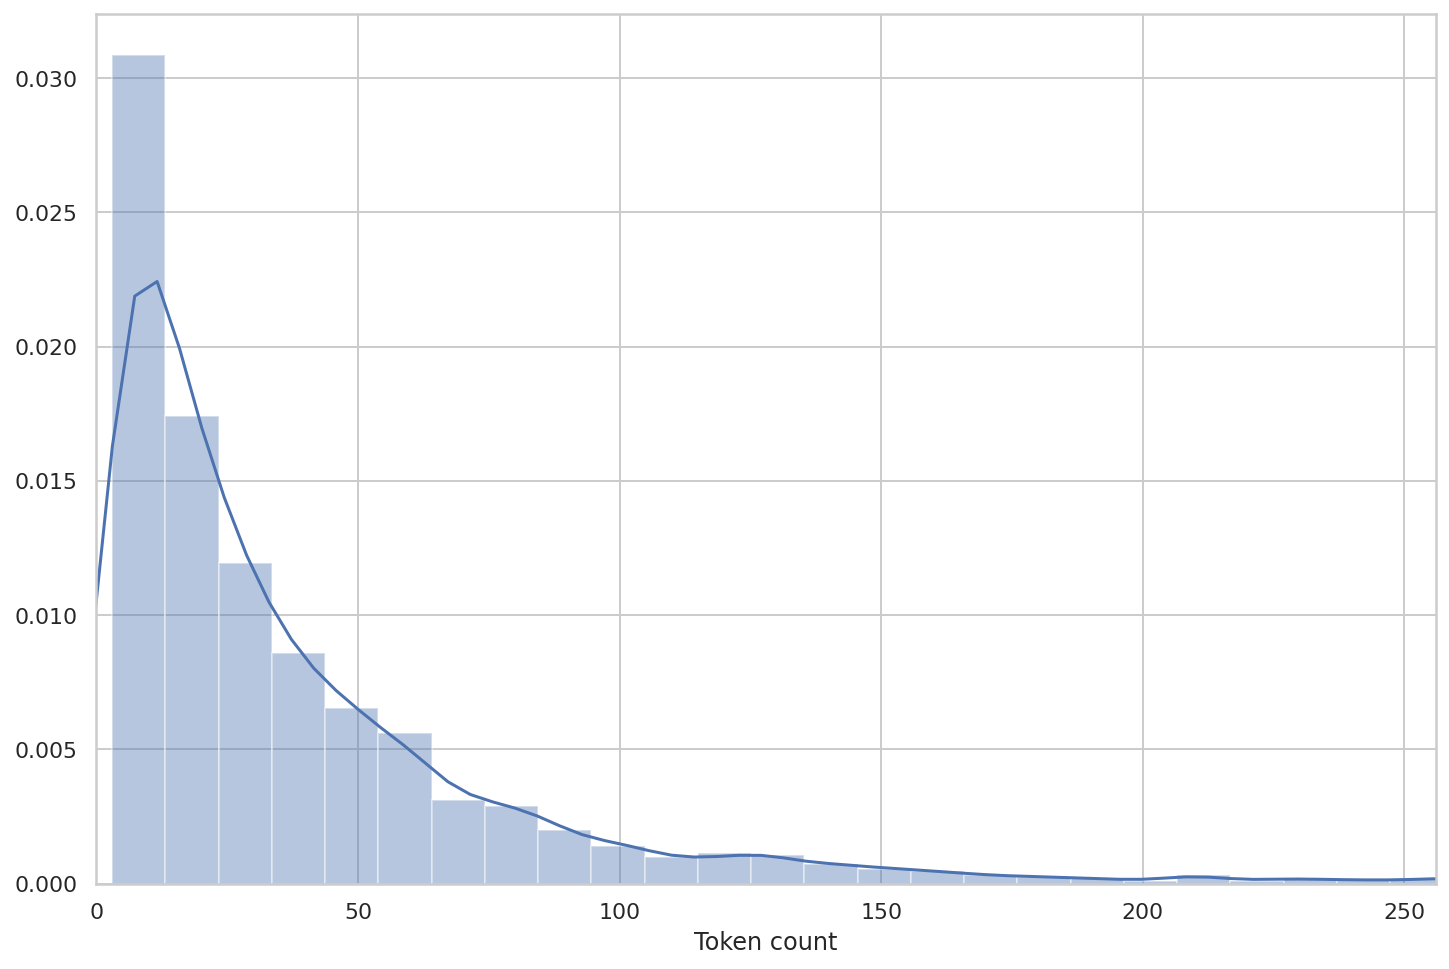

In [84]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

Most of the reviews seem to contain less than 120 tokens, but we’ll be on the safe side and choose a maximum length of 180. 

In [85]:
MAX_LEN = 160

## Preparing Torch Dataset for Advanced Data Handling

When working with PyTorch, it's essential to have a well-structured data generator class that can efficiently handle the data for model training and validation. This class plays a crucial role in preparing data for deep learning models.

### Why We Need a Robust Data Generator Class

1. **Data Transformation**: The data generator class is responsible for converting our raw data into a format that the model can work with. It manages tasks such as tokenization, padding, and encoding to ensure that text data can be fed into the model effectively.

2. **Batching**: It allows us to create mini-batches of data, which are essential for optimizing model training. Batching improves training efficiency and reduces memory consumption.

3. **Data Retrieval**: The data generator class handles data retrieval during training, ensuring that the model receives a consistent stream of data during the training process.

4. **Data Validation**: It is often designed to provide validation data, which helps us assess how well the model is performing on unseen examples.

### Returning Review Text for Validation

One key aspect mentioned in our approach is that we return the review text in addition to other data. This practice is incredibly useful


In [86]:
class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method (This method returns the total number of examples in your dataset. 
    #It's used by PyTorch's data loader to determine the dataset's size.)
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method (This method prepares and returns individual data samples when accessed by an index)
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,                     # The input review text
            add_special_tokens=True,    # Add special tokens (like [CLS], [SEP])
            max_length=self.max_len,    # Maximum sequence length (padding/truncation)
            return_token_type_ids=False,  # Not returning token type IDs
            pad_to_max_length=True,      # Pad sequences to max_length
            return_attention_mask=True,  # Return attention mask
            return_tensors='pt',        # Return PyTorch tensors
        )

        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

Create a 80% train data and 10% test and 10% validation data

In [87]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(4116, 3) (515, 3) (515, 3)


Create a dataloader to release data in batches.

In [88]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.body.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [89]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [90]:
# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


### The below output represents the first example in our data batch after tokenization.

* "Input token IDs shape: torch.Size([16, 180])" 
    indicates the shape of input token IDs. It's a PyTorch tensor with a shape of [16, 180], which means we have a batch size of 16 (each containing a sequence of 180 token IDs).
    
* "Target labels shape: torch.Size([16])" shows the shape of target labels. We have 16 target labels for this batch.

In [91]:
# Examples
data = next(iter(train_data_loader))

print("Keys in the data:")
print(data.keys())

# Input token IDs shape
input_ids = data['input_ids']
print(f"Input token IDs shape: {input_ids.shape}")

# Attention mask shape
attention_mask = data['attention_mask']
print(f"Attention mask shape: {attention_mask.shape}")

# Target labels shape
targets = data['targets']
print(f"Target labels shape: {targets.shape}")

# First example
print("\nFirst example:")
print("Input token IDs:", input_ids[0])
print("Attention mask:", attention_mask[0])
print("Target label:", targets[0])


Keys in the data:
dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
Input token IDs shape: torch.Size([16, 160])
Attention mask shape: torch.Size([16, 160])
Target labels shape: torch.Size([16])

First example:
Input token IDs: tensor([ 101, 2023, 3042, 2134, 1521, 1056, 2130, 2197, 1020, 2706,  999,  999,
         999,  100,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

## Sentiment Classification with BERT and Hugging Face

We’ll use the basic BertModel and build our sentiment classifier on top of it. Let’s load the model.

In [92]:
# Load the basic BERT model 
bert_model = BertModel.from_pretrained(MODEL_NAME)

In [93]:
# Build the Sentiment Classifier class 
class SentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        #  Add a dropout layer 
        output = self.drop(pooled_output)
        return self.out(output)

We use a dropout layer for some regularization and a fully-connected layer for our output. We are returning the raw output of the last layer since that is required for the cross-entropy loss function in PyTorch to work. Create an instance and move it to the GPU

## Model Initialization and Device Assignment

When working with deep learning models, it's crucial to properly initialize your model and assign it to the appropriate computing device. Here's how you can do it:

# Instantiate the model with the correct number of classes
# Move the model to the desired device (CPU or GPU)


In [94]:
# Instantiate the model and move to classifier
model = SentimentClassifier(len(class_names))
model = model.to(device)

#### Model Characterstics

In [95]:
# Number of hidden units
print(bert_model.config.hidden_size)

768


### Training Phase

Fine-Tuning:
In this use case, BERT is fine-tuned for specific sentiment analysis tasks. I have taken a pre-trained BERT model and adapted it to perform sentiment analysis on a particular Apple reviews dataset. Fine-tuning helps BERT adapt to specific nuances in sentiment expression in the data, resulting in improved accuracy.

AdamW is an optimizer from the PyTorch library that is used for updating the model's weights during training. It's a variant of the Adam optimizer with weight decay, which helps prevent overfitting during training.

I have also used a linear scheduler with no warmup. This function is often used in conjunction with the AdamW optimizer to set up a learning rate schedule that starts with a warm-up phase, where the learning rate gradually increases, and then a decay phase, where it gradually decreases.

### Setting up the training process for  BERT (transformer based model). 

Break down of each part of the code:
* EPOCHS = 10:
    Training process will go through the entire dataset 10 times. Setting it to 10 to keep the computational constraints in mind.

* Optimizer:
    optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False): This line initializes the optimizer for the model. It uses the AdamW optimizer with a learning rate of 2e-5.
        
* total_steps = len(train_data_loader) * EPOCHS: 
    This line calculates the total number of optimization steps that will be performed during training. It's essentially the number of mini-batches multiplied by the number of epochs. This value is used to schedule the learning rate.

* Setting num_warmup_steps to 0 means that there's no warm-up phase for the learning rate. Warm-up is often used to gradually increase the learning rate at the beginning of training to help the model converge faster. In this case, the learning rate remains constant. This hyperparameter could be fine-tuned.


In [96]:
# Number of iterations 
EPOCHS = 10

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [97]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

Function to evaluate model performance

In [98]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

Write the training Loop and store the best training state.

In [99]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.425511982306376 accuracy 0.858114674441205
Val   loss 0.4100510192131906 accuracy 0.8699029126213592

Epoch 2/10
----------
Train loss 0.2493399587430984 accuracy 0.9161807580174927
Val   loss 0.5199095672984241 accuracy 0.8796116504854369

Epoch 3/10
----------
Train loss 0.13739043817848198 accuracy 0.9582118561710398
Val   loss 0.5809138921428133 accuracy 0.8893203883495145

Epoch 4/10
----------
Train loss 0.07194752897051986 accuracy 0.9827502429543246
Val   loss 0.5737159319511248 accuracy 0.8834951456310679

Epoch 5/10
----------
Train loss 0.040027370387390473 accuracy 0.9907677356656948
Val   loss 0.639725190530898 accuracy 0.887378640776699

Epoch 6/10
----------
Train loss 0.018026879354417973 accuracy 0.9958697764820214
Val   loss 0.7377924344706999 accuracy 0.8854368932038834

Epoch 7/10
----------
Train loss 0.01811636355761962 accuracy 0.9961127308066083
Val   loss 0.7240304357299906 accuracy 0.8815533980582524

Epoch 8/10
----------
Tr

We will plot the training and validation accuracy.

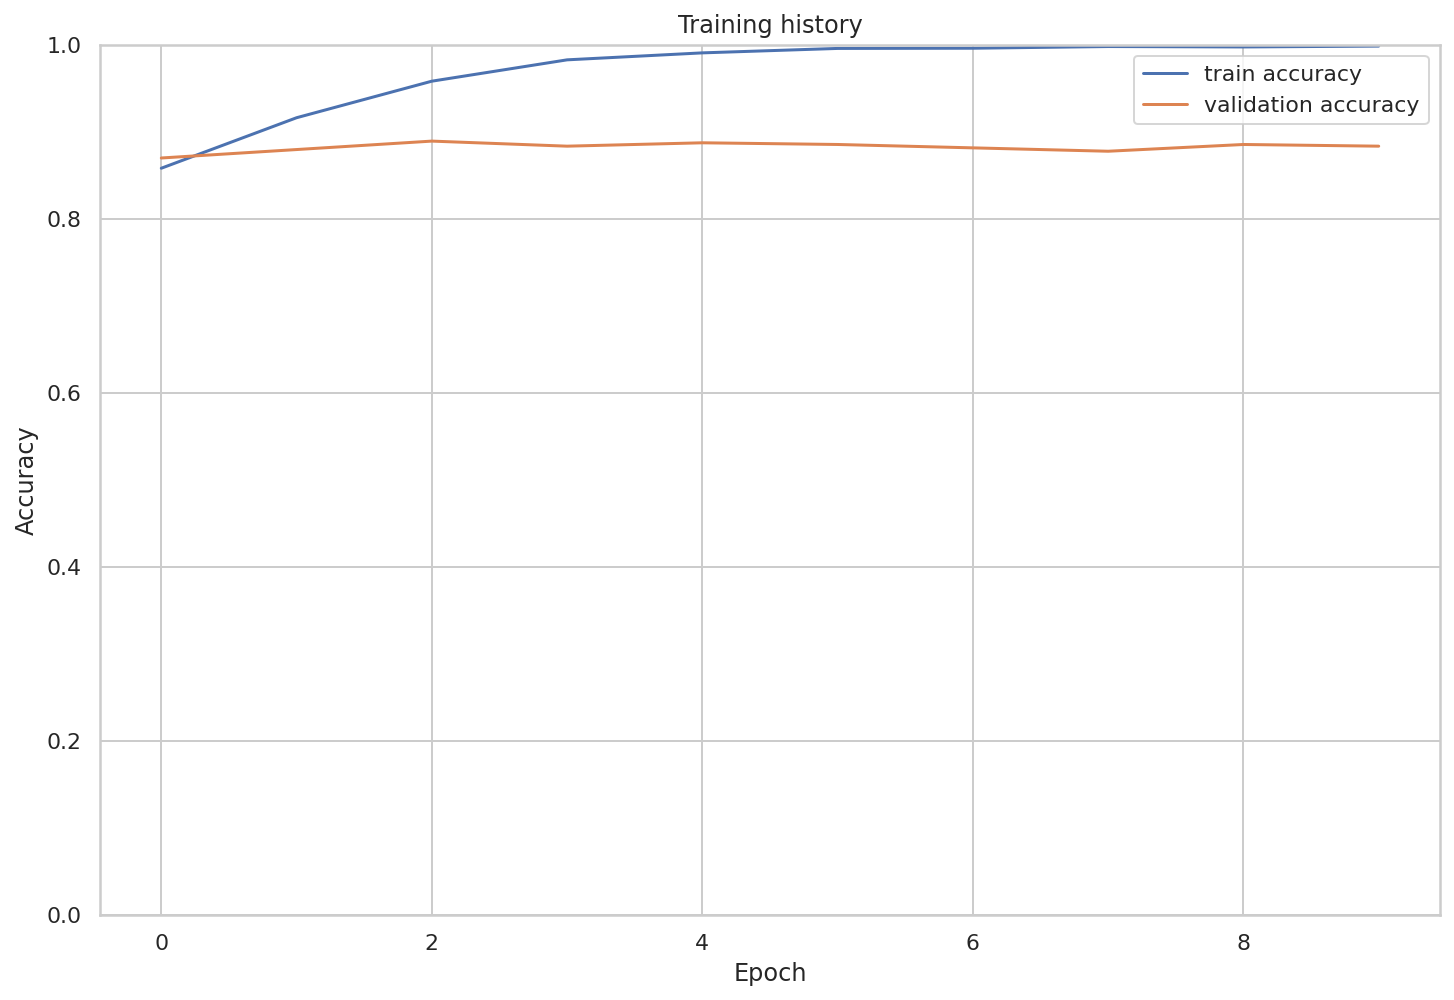

In [100]:
# Plot training and validation accuracy
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

### Model Evaluation

In [101]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.8932038834951456

Define a helper function to get predictions from our models. This is similar to the evaluation function, except that we’re storing the text of the reviews and the predicted probabilities

In [102]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [103]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)

In [104]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.87      0.83      0.85       137
     neutral       0.47      0.58      0.52        33
    positive       0.95      0.95      0.95       345

    accuracy                           0.89       515
   macro avg       0.77      0.79      0.77       515
weighted avg       0.90      0.89      0.90       515



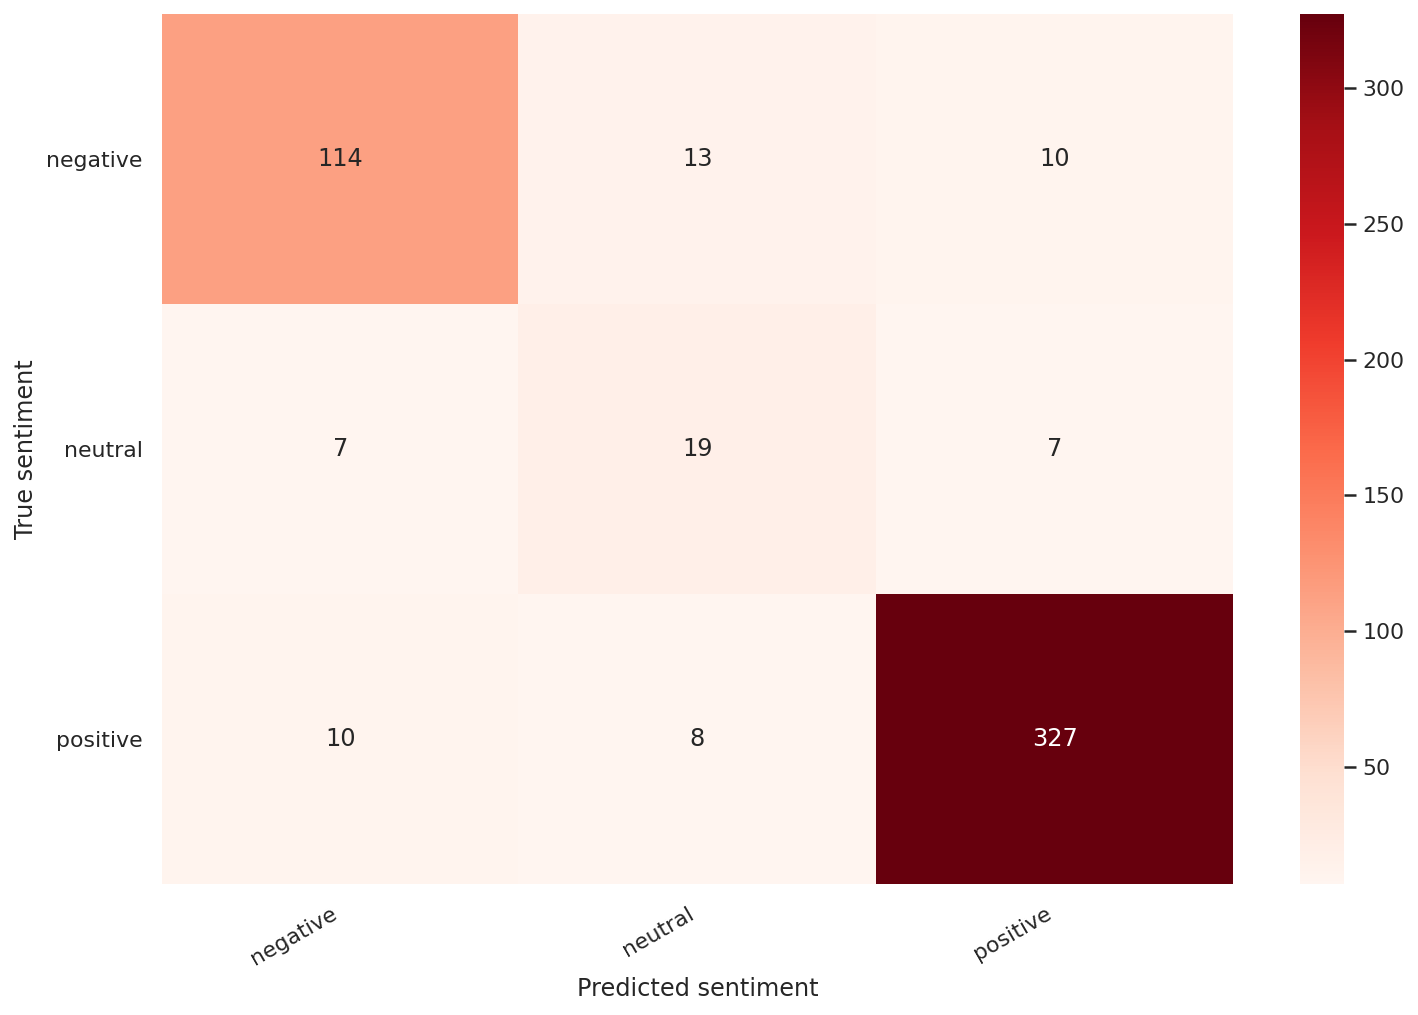

In [105]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Reds")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

This confirms that our model is having difficulty classifying neutral reviews. It mistakes those for negative and positive at a roughly equal frequency.

That’s a good overview of the performance of our model.

## Predicting on raw text

In [106]:
review_text = "Significant deterioriation of battery life in iphone 13 & above as compared to iphone 12 battery life"

In [107]:
encoded_review = tokenizer.encode_plus(
    review_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

In [108]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: Significant deterioriation of battery life in iphone 13 & above as compared to iphone 12 battery life
Sentiment  : neutral
